# <center>Lab session 3: Security & privacy models and metrics </center> <center>computer section - Task 8</center>

##### Below are necessary modules for this assignment. If some of these modules are not found, you need to install them via your terminal using the "conda install", "pip install", or "pip3 install" commands.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import random
import math
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

##### We created a fictitious dataset 

In [3]:
data = pd.DataFrame(columns = ["Age", "Gender", "Marital", "Income", "Neighbourhood", "IceCream"],\
                    index=range(1000))
data.Age = np.random.randint(18, 73, 1000)
genders = ["male"]*420 + ["female"]*430 + ["nonbinary"]*150
random.shuffle(genders)
data.Gender = genders
status = ["married"]*700 + ["single"]*300
random.shuffle(status)
data.Marital = status
data.Income = 10000*np.random.randint(3,13, 1000)
data.Neighbourhood = np.random.randint(1,10, 1000)
icecream = ["vanilla"]*360 + ["chocolate"]*330 + ["strawberry"]*310
random.shuffle(status)
data.IceCream = icecream

##### Here's a sample of the dataset

In [4]:
data.sample(10)

,Age,Gender,Marital,Income,Neighbourhood,IceCream
942,54,female,single,110000,1,strawberry
96,51,female,single,40000,2,vanilla
63,63,female,married,100000,6,vanilla
257,50,female,married,60000,6,vanilla
971,56,female,married,60000,9,strawberry
398,22,male,single,100000,6,chocolate
713,22,female,married,50000,2,strawberry
440,49,male,single,80000,7,chocolate
843,49,male,single,30000,9,strawberry
895,23,male,married,50000,2,strawberry


##### TO DO#1: Explore the data set & practice pandas commands (https://www.geeksforgeeks.org/python-pandas-dataframe-loc/)

In [8]:
# # Examples of EDA (Exploratory Data Analysis) 
#Find data size
print(len(data))
#Find amount of male subjects in a specific neighbourhood
print(len(data.loc[(data.Neighbourhood==3)&(data.Gender=="male")]))
#Find amount of subjects making more than 60000 euros
print(len(data.loc[data.Income>60000]))
#Find the average income of non-binary subjects
print(data.loc[data.Gender=="nonbinary", "Income"].mean())

1000
46
591
73400.0


# Task 8: Compute several privacy metrics

### Metric A: Anonymity set size
### You are the attacker, and obtained only part of the dataset as shown below. You have a specific subject in mind, whom you know the address of (He is in neighbourhood 8). You know it's a married male. Now, you want to know his age. 

In [9]:
partial_data = data.iloc[:, [1,2,4]]
partial_data.sample(10)

,Gender,Marital,Neighbourhood
248,female,married,4
250,male,single,7
533,female,married,7
874,male,married,3
14,female,married,9
285,female,married,4
251,female,married,4
347,female,married,8
278,female,married,7
180,male,married,5


### TO DO #2: What is the total anonymity set size?

In [10]:
# Tip: Filter your dataset to match the attacker's info

anonymity_set_size = len(partial_data.loc[(partial_data.Gender=="male") &\
                                     (partial_data.Marital=="married")&\
                                     (partial_data.Neighbourhood==8)])

In [11]:
print(f"Your anonymity set size is {anonymity_set_size}. \
There are {anonymity_set_size} subjects in your stolen dataset which could match the \
information you have on your subject.")

Your anonymity set size is 36. There are 36 subjects in your stolen dataset which could match the information you have on your subject.


### Metric B: Entropy
### For $n$ subjects, ($x_{1}$, $x_{2}$, ..., $x_{n}$), there is a probability $p(x_{i})$ that the attacker can obtain/guess the correct value of $x_{i}$.
### You are the holder of the dataset. You want to find out the entropy value $H$ of the Marital status variable of your dataset. That is, if the attacker had a specific subject in mind, what is the likelihood that the attacker could guess the marrital status of that subject (e.g. if the attacker guesses the subject is male - what are the chances that he is right?)
### TO DO #3: Calculate the probability $p(marital_{married})$ that a male subject is married. 

In [12]:
# Calculate the probability of a male subject marital status for each option
#tip: use pandas' value_counts function
p = data.loc[data.Gender=="male", "Marital"].value_counts(normalize=True)[0]


In [13]:
print("Here are the resulting probability that a male is married is ", p)
print("The probability that a male is single is 1-p, that is ", 1-p)

Here are the resulting probability that a male is married is  0.6785714285714286
The probability that a male is single is 1-p, that is  0.3214285714285714


### TO DO #4: Calculate the entropy value $H$ from the following formula and interpret its meaning. 
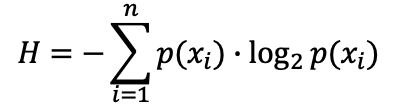
### Remember, the closer to $H$ is to $1$, the higher the entropy, the more "random" the data (i.e. picking a random subject is not more likely to belong to a category or another.) This metric is calculated by the data holder to understand the uncertainty of the information that may be obtained by an attacker. Note: the log is base 2 because there are two options: married and not married (aka $p(marital_{married}$ and $1-p(marital_{married}$)

In [14]:
#Calculate H
#tip: you can use numpy's functions 
#(https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf).
def entropy_2options(p):
    """Calculate entropy H using the probability of a category (e.g. married)."""
    entropy = -((p*np.log2(p)) + ((1-p)*np.log2(1-p)))
    return entropy
H = entropy_2options(p)

In [15]:
print(f"The value of the entropy of a married male H is: {H}. \n\
What does this mean about the entropy of the Marital status?")

The value of the entropy of a married male H is: 0.9059282160429991. 
What does this mean about the entropy of the Marital status?


### What would the entropy calculation given $n = 3$ for each $x_n$? For example, gender has 3 options, male, female, non-binary. The distribution of that variable is easy to guess, based on well known public census data. However, what about ice cream preferences? This variable is interesting because the guess of the attacker cannot be really founded on reliable hypotheses.
### TO DO #5: Try 3 different techniques an attacker might use to estimate ice cream preference distribution (randomized, strawberry-biased population, balanced distribution), while calculating entropy with $log(base=3)$. 

In [16]:
#Tip: if you find the actual distribution of the data, you will see find the index of each ice cream flavor.
data.IceCream.value_counts(normalize=True)

vanilla       0.36
chocolate     0.33
strawberry    0.31
Name: IceCream, dtype: float64

### Note that the first element in your probability list will be the probability of vanilla preference. Now, construct for each technique, the probablity $p(x_{vanilla})$ and the probability of not vanilla $1 - p(x_{vanilla})$ for a subject. You can also do so for the $p(x_{chocolate})$  and $p(x_{strawberry})$  by changing the index.

In [17]:
#Construct your p for each ice cream flavor based on 3 techniques.
#1. Randomly generated distribution:
p_random =  [random.random() for i in range(1,4)]
s = sum(p_random)
p_random = [ i/s for i in p_random]

#2. Vanilla bias
p_vanillaBias = [0.8, 0.19, 0.01]

#3. Even distribution
p_even = [0.34, 0.33, 0.33]

### TO DO #6 : What does the new entropy function look like, given $n=3$?

In [18]:
def entropy_3options(p):
    """Calculate entropy H using the probability of a vanilla ice cream preference 
    (and the probability of a non-vanilla preference)"""
    entropy = -(p * np.log(p)/np.log(3)).sum()
    return entropy


In [19]:
#Here we calculate the entropy of the probability for vanilla preference given the random hypothesis
H_random = entropy_3options(p_random)
print(f"The entropy value given the random-ice cream preference hypothesis \
for vanilla preference is {H_random}")

The entropy value given the random-ice cream preference hypothesis for vanilla preference is 0.9672484220288031


In [20]:
#Here we calculate the entropy of the probability for vanilla preference given other hypotheses
H_vanilla_bias = entropy_3options(p_vanillaBias)
H_even = entropy_3options(p_even)

### Below you can visualize the value of $H$ given different 3 options for $x$ (0-vanilla, 1-chocolate, 2-strawberry)

/var/folders/f6/8cblqgm51_l7vc0l47h_c2bw0000gn/T/ipykernel_16127/1048663381.py:16: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 13


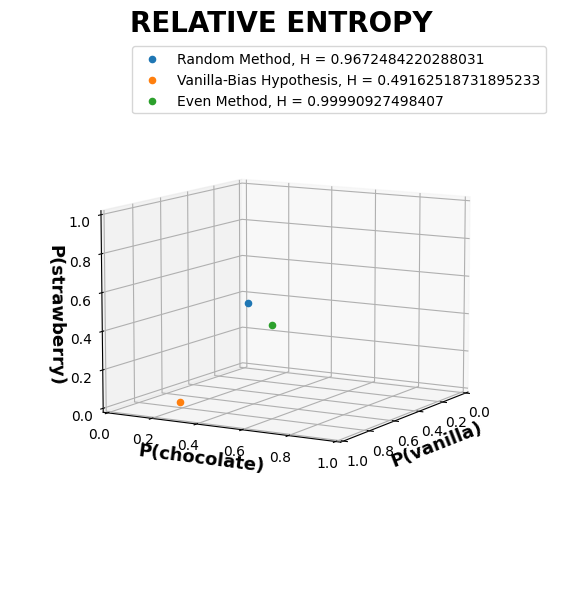

In [21]:
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0, right=1) 
ax.axes.set_ylim3d(bottom=0, top=1) 
ax.axes.set_zlim3d(bottom=0, top=1) 
ax.scatter(p_random[0], p_random[1], p_random[2])
ax.scatter(p_vanillaBias[0], p_vanillaBias[1], p_vanillaBias[2])
ax.scatter(p_even[0], p_even[1], p_even[2])
ax.set_xlabel('P(vanilla)', fontsize=13, fontweight="bold")
ax.set_ylabel('P(chocolate)', fontsize=13, fontweight="bold")
ax.set_zlabel('P(strawberry)', fontsize=13, fontweight="bold")
plt.legend(labels=[f'Random Method, H = {H_random}', f'Vanilla-Bias Hypothesis, H = {H_vanilla_bias}', \
                   f'Even Method, H = {H_even}'])
plt.title("RELATIVE ENTROPY", fontsize=20, fontweight="bold")
ax.view_init(10, 30)
ax.dist = 13
plt.show()

### Metric C: Relative Entropy
### Now, the adversary wants to find the probability $q(x_{i})$ that a subject is married. All they know is that the subject is male. First thing they do, is look at the general statistics for the Dutch population:
https://www.statista.com/statistics/519839/population-of-the-netherlands-by-marital-status/

### TO DO #7 Create an array $q(Marital_{male})$ with the probability of being married and being single in the netherlands

In [42]:
p = data.Marital.value_counts().values/1000

In [44]:
# Create an 2x1 array q
q = [0 , 0]
# Fill in your found probability guesses
q[0] = 0.3
q[1] = 0.7

In [23]:
print(f"Based on the netherlands statistics, you guess the distribution of marital status\
for your male subject as follows: There is a q(married male) of {q[0]} and a q(single male) of {q[1]}")

Based on the netherlands statistics, you guess the distribution of marital statusfor your male subject as follows: There is a q(married male) of 0.3 and a q(single male) of 0.7


In [ ]:
# write down your interpretation
# There is a higher probability of the male subject to be single, according to the attacker

### The Kullback-Leibler divergence equation calculates the distance $D$ between the real distribution of probabilities and the one guessed by the adversary. A distance of $0$ means the adversary has correctly guessed the probability, a distance of $1$ or above, indicates a largely mistaken probability guess.
### Remember, this metric would be calculated by a data holder if they have information on the attacker's obtained probability $q$ or by an all-knowing entity.
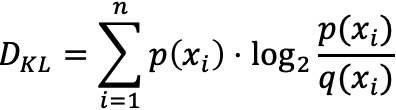
### TO DO #8: Calculate the Kullback-Leibler divergence value $D$

In [45]:
# Calculate D using numpy
def kullback(p, q):
    """Calculate the divergence value using two arrays, p and q"""
    divergence = np.sum(np.log2(p/q)*p)
    return divergence

In [46]:
D = kullback(p, q)

In [47]:
print(f"The value of the Kullback-Leibler divergence is {D}. \
What does this indicate about the attacker's guess?")

The value of the Kullback-Leibler divergence is 0.48895696853457926. What does this indicate about the attacker's guess?


In [48]:
# write down your interpretation
# The guess of the attacker was wrong because the distance is quite large

### Image the attacker further learns that the dataset is based subjects that live in residential neighbourhoods, which a slightly bigger chance that the subject is married than not.
### TO DO #9: Create a new probability set $q_{residential}$ and calculate the divergence value before interpreting it.

In [49]:
# Calculate D_residential based on q_residential
q_residential = ANSWER = [0.52, 0.48]
D_residential = kullback(p, q_residential)
print(f"The divergence between a potential attacker's guess given the \
extra information about the dataset, and the actual distribution is {D_residential}.")

The divergence between a potential attacker's guess given the extra information about the dataset, and the actual distribution is 0.09676873762892058.


### What does this tell you about the danger of an attacker learning the nature of your dataset even without even obtaining a sample?

In [50]:
#Write down your interpretation and thoughts (on this topic) here
# The attacker's guess is getting closer to the ground truth

### Image the attacker further learns that the dataset is based on employees of the UvA. That's an even narrower piece of information. There, the probability that an employee is married is much higher. 
### TO DO #10: Create a new probability set $q_{uva}$ and calculate the divergence value before interpreting it.

In [52]:
# Calculate D_uva based on q_uva
q_uva = [0.69, 0.31]
D_uva = kullback(p, q_uva)
print(f"The divergence between a potential attacker's guess given the \
extra information about the dataset, and the actual distribution is {D_uva}.")

The divergence between a potential attacker's guess given the extra information about the dataset, and the actual distribution is 0.00033927768325120455.


### What does this tell you about the danger of an attacker learning the nature of your dataset even without even obtaining a sample?

In [53]:
#Write down your interpretation and thoughts (on this topic) here
# The guess of the attacker is almost correct

##  Visualize Relative Entropy 

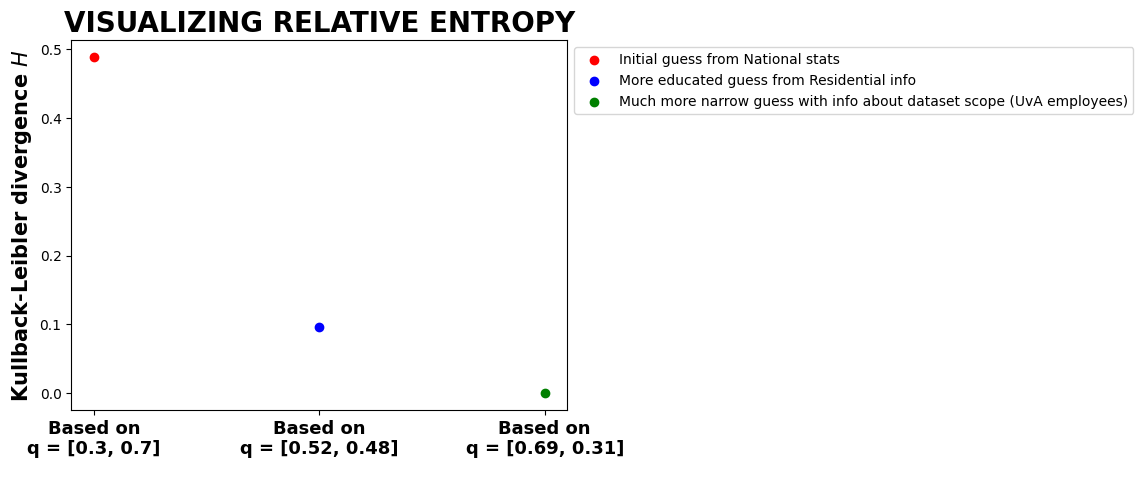

In [54]:
import itertools
colors = itertools.cycle(["r", "b", "g"])
x = [1, 2, 3]
y = [D, D_residential, D_uva]
for i in range(3):
    plt.scatter(x[i], y[i], color=next(colors))
plt.title("VISUALIZING RELATIVE ENTROPY", fontsize=20, fontweight="bold")
plt.xlabel("" )
plt.ylabel(f"Kullback-Leibler divergence $H$" , fontsize=15, fontweight="bold")
plt.xticks(ticks = x, labels=[f"Based on\nq = {q}", \
                              f"Based on\nq = {q_residential}", \
                              f"Based on\nq = {q_uva}\n"], fontsize=13, fontweight="bold")
plt.legend(["Initial guess from National stats", "More educated guess from Residential info",\
           "Much more narrow guess with info about dataset scope (UvA employees)"],\
           bbox_to_anchor=(1, 1))
plt.show()

### Metric D: Expected estimation error
### In this scenario, the adversary has made guesses for each of the subjects' age. Based on the census data (https://www.statista.com/statistics/519754/population-of-the-netherlands-by-age/), they hypothesis that percentage of people in their 40s are as follows:
### P(40 years old) = 15%, p(41), p(45) or p(47) = 10%, p(49) = 30%, and the rest of the ages in the 40s range = 5%.
### Now, imagine they try to guess the age of one particular subject, based on their guessed distribution. They have zero information about the subject's age.
### You, the defender, know the person's age is 45.
### The Expected Estimation Error equation goes as follows: 
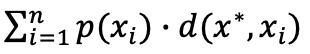
### where $p(x)$ is the probability, according to the naive attacker, that their guessed age is correct, $x*$ is the correct age only known to the defender, $x_i$ is their guessed age, and $d()$ is the absolute difference between the correct and guessed age.
### TO DO #11: Calculate the excepted estimation error of the attacker, if they guess that the subject is 49 years old based on their hypothesized distribution.


In [55]:
#Calculate the eee (expected estimation error)
eee = (np.abs(45-49)*0.3)

In [56]:
print(f"The attacker's Expected Estimated Error is {eee}")

The attacker's Expected Estimated Error is 1.2


### TO DO #12: Calculate the expected estimation error of the attacker, if they include all the information available to them in their hypothesized distribution

In [57]:
eee_all = (np.abs(45-40)*0.15) +\
(np.abs(45-41)*0.1) +\
(np.abs(45-42)*0.05) +\
(np.abs(45-43)*0.05) +\
(np.abs(45-44)*0.05) +\
(np.abs(45-45)*0.1) +\
(np.abs(45-46)*0.05) +\
(np.abs(45-47)*0.1) +\
(np.abs(45-48)*0.05) +\
(np.abs(45-49)*0.3)

In [58]:
print(f"The attacker's Expected Estimated Error is now {eee_all}")

The attacker's Expected Estimated Error is now 3.05
